# Load libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import twitter_samples
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer

import utils


# Load dataset - About the Twitter dataset
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

Downloads sample twitter dataset using below code: \
nltk.download('twitter_samples')

In [2]:
#nltk.download("twitter_samples")

In [3]:
#nltk.download('wordnet')

In [4]:
pos_tweets=twitter_samples.strings("positive_tweets.json")
neg_tweets=twitter_samples.strings("negative_tweets.json")

In [5]:
tweet_labels = np.append(np.ones((len(pos_tweets))), np.zeros((len(neg_tweets))))

In [6]:
print(tweet_labels)
print("Positive Tweets={}, Negative tweets={}".format(len(pos_tweets),len(neg_tweets)))

[1. 1. 1. ... 0. 0. 0.]
Positive Tweets=5000, Negative tweets=5000


In [7]:
print("Positive: ",pos_tweets[34])
print("Negative: ",neg_tweets[34])

Positive:  everyone watch the documentary Earthlings on YouTube :-)
Negative:  It sucks so much been sick i was plan to start work on my first gundam to night but nope. :(


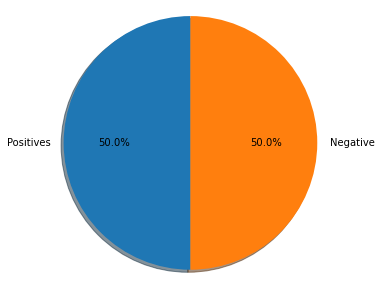

In [8]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(pos_tweets), len(neg_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# Preprocessing text for sentimental analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:



* Convert all your words to lower case \
* Remove punctuation, URL's and names \
* Remove stop words \
* Stemming or lemmatization \
* Tokenize the string into words.

In [9]:
tweet = pos_tweets[101]
print(tweet)

@AxeRade haw phela if am not looking like Mom obviously am looking like him :)


## Converting into lowercase and removing href

In [10]:
tweet = tweet.lower()
print(tweet) #\033[92m green color

@axerade haw phela if am not looking like mom obviously am looking like him :)


In [11]:
#remove retweet text "RT"
tweet = re.sub(r'RT[\s]+','',tweet)

#remove href
tweet = re.sub(r'https?:\/\/.*[\r\n]*','',tweet)

print(tweet)

@axerade haw phela if am not looking like mom obviously am looking like him :)


## Tokenization
To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:

In [12]:
tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet)
print(tweet)
print(tweet_tokens)

@axerade haw phela if am not looking like mom obviously am looking like him :)
['haw', 'phela', 'if', 'am', 'not', 'looking', 'like', 'mom', 'obviously', 'am', 'looking', 'like', 'him', ':)']


## Remove stop words and punctuations
The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [13]:
stop_words = stopwords.words('english')
punctuations = string.punctuation

print(stop_words)
print(punctuations)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

 Sometime may be some stopwords are important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

In [14]:
tweet_tokens_clean = []
for word in tweet_tokens:
    if (word not in stop_words) and (word not in punctuations):
        tweet_tokens_clean.append(word)

In [15]:
print("Original tweet: ",tweet_tokens)
print("Cleaned tweet:  ",tweet_tokens_clean)

Original tweet:  ['haw', 'phela', 'if', 'am', 'not', 'looking', 'like', 'mom', 'obviously', 'am', 'looking', 'like', 'him', ':)']
Cleaned tweet:   ['haw', 'phela', 'looking', 'like', 'mom', 'obviously', 'looking', 'like', ':)']


## Lemmitization
Lemmatization is the process of converting a word to its meaningful base form considers the context, which is called Lemma.

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
tweet_clean = []
for word in tweet_tokens_clean:
    tweet_clean.append(lemmatizer.lemmatize(word))

In [18]:
print(tweet_tokens_clean)
print(tweet_clean)

['haw', 'phela', 'looking', 'like', 'mom', 'obviously', 'looking', 'like', ':)']
['haw', 'phela', 'looking', 'like', 'mom', 'obviously', 'looking', 'like', ':)']


## Making a function consists of all the above preprocessing steps

In [19]:
def preprocess_tweet(tweet):
    
    #lower case
    tweet = tweet.lower()
    
    #remove retweet text "RT"
    tweet = re.sub(r'RT[\s]+','',tweet)

    #remove href
    tweet = re.sub(r'https?:\/\/.*[\r\n]*','',tweet)
    
    tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True,reduce_len=True)
    tweet_tokens     = tokenizer.tokenize(tweet)
    
    stop_words = stopwords.words('english')
    punctuations = string.punctuation
    
    tweet_tokens_clean = []
    for word in tweet_tokens:
        if (word not in stop_words) and (word not in punctuations):
            tweet_tokens_clean.append(word)
    
    lemmatizer = WordNetLemmatizer()
    tweet_tokens_clean = []
    for word in tweet_tokens:
        if (word not in stop_words) and (word not in punctuations):
            tweet_tokens_clean.append(word)
    return tweet_tokens_clean

In [20]:
print("\033[92m",tweet)
print("\033[94m",preprocess_tweet(tweet))

 @axerade haw phela if am not looking like mom obviously am looking like him :)
 ['haw', 'phela', 'looking', 'like', 'mom', 'obviously', 'looking', 'like', ':)']


# Word frequency dictionary
The function build_freq() that creates the dictionary containing the word counts from each corpus.

In [21]:
all_tweets = pos_tweets + neg_tweets

In [29]:
def build_freq(tweets,y):
    y_list = y.tolist()
    
    freq = {}
    
    for y,tweet in tqdm(zip(y_list,tweets)):
        for word in preprocess_tweet(tweet):
            pair = (word,y)
            if pair in freq:
                freq[pair] += 1
            else:
                freq[pair] = 1
    return freq

In [30]:
tweet_labels

array([1., 1., 1., ..., 0., 0., 0.])

In [31]:
freqs = build_freq(all_tweets,tweet_labels)

10000it [00:09, 1072.83it/s]


In [38]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happy', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [39]:
# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happy', 190, 25],
 ['merri', 0, 0],
 ['nice', 98, 18],
 ['good', 234, 99],
 ['bad', 18, 68],
 ['sad', 4, 121],
 ['mad', 2, 9],
 ['best', 64, 22],
 ['pretti', 0, 0],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 15, 22],
 ['idea', 21, 10],
 ['power', 4, 5],
 ['play', 18, 27],
 ['magnific', 0, 0]]

C:\Users\abhas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


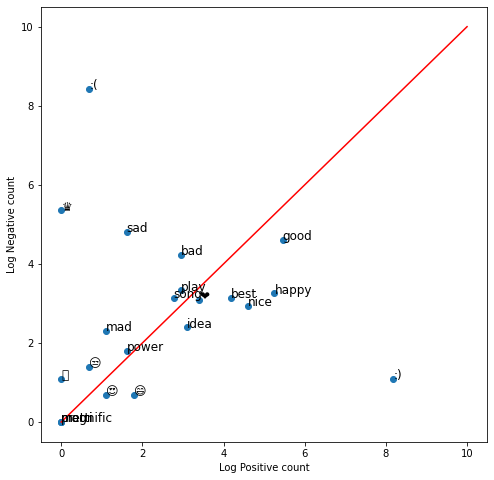

In [40]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 10], [0, 10], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons :) and :( are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!